In [2]:
from IPython.display import HTML

### Q1. 

What is happening here? Hazard a guess as to why these id's are the same.

In [6]:
e=[1,2,3,4]
d=1
id(e[0]), id(d)

(4297514912, 4297514912)

The id's are the same because Python uses variables as labels attached to objects. Even though the labels are different, both e[0] and d are pointing to the same object (the number 1).

In [7]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=e%3D%5B1,2,3,4%5D%0Aprint(%22e%22,e%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=true&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

### Q2.

Here we work through an example taken from SICP, in which we try and write a bank account withdrawal system

In [25]:
def make_withdraw1(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):#you are ok if you use balance as a read-only property
        if amount > balance:
            return 'Insufficient funds'
        return balance - amount
    return withdraw

Lets make a 5 buck withdrawal

In [26]:
wdfrom20=make_withdraw1(20)
wdfrom20(5)

15

Lets do it again

In [27]:
wdfrom20(5)

15

This is not quite what we want. We'd want it to go down to 10 on a repeated withdrawal. Remember, writing it like this, we have no access to `balance` directly. In other words, we want `balance` that was captured from the enclosing frame to be *changeable*, not unchangeable. 

Lets try something simple. Even though `balance` was captured from the enclosing frame, lets try reassigning it in `withdraw`. So, write a new `make_withdraw2` in which `withdraw` has this re-assignment. What happens when you do this?

In [41]:
def make_withdraw2(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):#you are ok if you use balance as a read-only property
        if amount > balance:
            return 'Insufficient funds'
        balance = balance - amount
        return balance
    return withdraw

In [42]:
wdfrom20_2=make_withdraw2(20)
wdfrom20_2(5)

UnboundLocalError: local variable 'balance' referenced before assignment

If you did it right, you should have got an error. As the Python Execution Model says:

> If a name binding operation occurs anywhere within a code block, all uses of the name within the block are treated as references to the current block. This can lead to errors when a name is used within a block before it is bound. This rule is subtle. Python lacks declarations and allows name binding operations to occur anywhere within a code block. The local variables of a code block can be determined by scanning the entire text of the block for name binding operations.

What has happened is that `balance` is now being treated as a local variable in `withdraw`, since the assignment has created a "name" for it. And then it does not have a value.

### Q3.

We need to somehow tell Python that `balance` is NOT a local variable. The way to do this is the `nonlocal` keyword. Write a function `make_withdraw` using  

`nonlocal balance` 

as the first line of the inner `withdraw` function. 

In [43]:
def make_withdraw(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):#you are ok if you use balance as a read-only property
        nonlocal balance
        if amount > balance:
            return 'Insufficient funds'
        balance = balance - amount
        return balance
    return withdraw

In [44]:
from20_correct = make_withdraw(20)
from20_correct(5)

15

In [45]:
from20_correct(5)

10

### Q4.

Go to http://pythontutor.com/index.html, choose Python 3.3 as the language, and visualize your code. Embed the code from above in there. Pay attention to the variable `balance` in `f1: make_withdraw`.

In [47]:
#your code here

### is there a question in here? not clear...
### looking at the variable balance in f1: make_withdraw, we can see that now the value changes with each 
### run of from20_correct(5), which we expect from setting the variable to be nonlocal



Notice that using the "constructor" `make_withdraw` twice creates two different "objects".

In [48]:
wd=make_withdraw(20)
print(wd(5))
wd2=make_withdraw(100)
print(wd2(5))

15
95


In [49]:
id(wd),id(wd2)

(4363017616, 4363074824)

Futhermore, notice that even though we cant access `balance` directly, we can change its value using the "created". So we now have a way to create state, as well as a way to change it. This is a very simple object system.

### Q5.

Use the decorator `timer` which we developed in the lecture to time how long it takes a function to run. Use this timer to plot a graph of the amount of time it takes to fill multiple arrays of size 100, 1000, 10000, 100000, 1000000, 10000000 with integers upto and not including that number.

In [4]:
#the decorator, slightly modified
import time
def time_returner(f):
    def inner(*args):
        t0 = time.time()
        f(*args)
        elapsed = time.time() - t0
        return elapsed
    return inner

In [5]:
# first we write a function to fill an array with consecutive integers up to and not including the number which
# corresponds to the size of the array

# then we can put the whole thing (with decorator) into a loop to go over the different array sizes

arrs = [100, 1000, 10000, 100000, 1000000, 10000000]
arrs_time = []
for j in range(len(arrs)):
    @time_returner
    def int_func(n):
        y = []
        for i in range(n):
            y.append(i)
        return y
    arrs_time.append(int_func(arrs[j]))

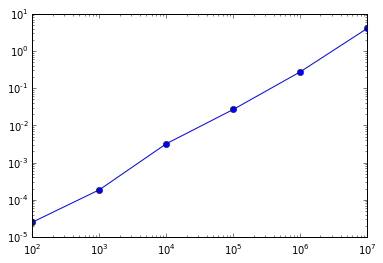

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.plot(arrs,arrs_time,'bo-')
plt.yscale('log')
plt.xscale('log')

### Q6.

A decorator can have arguments.

If you want to create a decorator with arguments, such as for example, a state that is global such as a counter, what you need to do is to capture the state variable as a closure inside the decorating function.

Here is the skeleton for that:

```python
def call_to_create_a_decorator(state_arguments):
    def this_is_the_decorator_function(user_function):
        def inner_function(*args):
            #wrapping stuff here
            output = user_function(*args)
            #pehaps more wrapping here
            return output # or something else
        return inner_function
    return this_is_the_decorator_function
```

In [65]:
def call_counter(count_dictionary):
    def call_counter_decorator(func):
        def inner(*args, **kwargs):
            n = func.__name__
            output = func(*args, **kwargs)
            return output
        return inner
    return call_counter_decorator

In [66]:
storage={}

In [67]:
@call_counter(storage)
def fib_recursive(n):
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib_recursive(n-2) + fib_recursive(n-1)

In [68]:
@call_counter(storage)
def fact(n):
    if n<=1:
        return 1
    else:
        return n*fact(n-1)

Run the following code:

```python
for i in [7, 13, 29]:
    fib_recursive(i)
    fact(i)
    print(i, storage['fib_recursive'], storage['fact'])
```

In [70]:
for i in [7, 13, 29]:
    fib_recursive(i)
    fact(i)
    print(storage)
#     print(i, storage['fib_recursive'], storage['fact'])

{}
{}
{}


Enter the last two numbers (as below) in the google form http://goo.gl/forms/Fyv2PLiJdw.

In [45]:
print(storage['fib_recursive'], storage['fact'])

KeyError: 'fib_recursive'